In [31]:
import dropbox
import matplotlib.pyplot as plt
import pandas as pd
from data_extract_utils import extract_zip
from zipfile import ZipFile

# Connect to dropbox
dbx = dropbox.Dropbox('cHV7yAR0J6YAAAAAAAAAAVQ1NLCrOwerbaNltPWHslYXKuUTJ5_wfgJsuFcmx83o')

In [6]:
# Download, and extract data from dropbox into memory. 
data = {}
for entry in dbx.files_list_folder('').entries:
    response = dbx.files_download('/{}'.format(entry.name))
    
    if 'zip' in entry.name:
        content = extract_zip(response[1].content)
    
        for file in content:
            df = pd.read_csv(file[1])
            data[entry.name.replace('.csv.zip', '')] = df

In [7]:
print(data.keys())

dict_keys(['application_test', 'application_train', 'bureau_balance', 'bureau', 'credit_card_balance', 'installments_payments', 'POS_CASH_balance', 'previous_application'])


In [8]:
data['application_test'].head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Previous Application CSV EDA

In [62]:
pa_df = data['previous_application']

In [65]:
print('Previous Application shape:', pa_df.shape)

Previous Application shape: (1670214, 37)


In [21]:
pa_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Initial Observations

We have several columns that are of dtype 'object', let's take a look at these:

In [29]:
cat_cols = [col for col in pa_df.columns if pa_df[col].dtypes == 'O']
pa_df[cat_cols].head()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


Some fields that may be interesting to explore:

- CODE_REJECT_REASON - Top reasons of previous application rejection
- NAME_CASH_LOAN_PURPOSE - Purpose of cash loan in previous application
- NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application
- NAME_CONTRACT_STATUS - Contract approved or not
- NAME_CONTRACT_TYPE - Contract product type of previous application
- NAME_PAYMENT_TYPE - Payment method that client choose to pay for the previous application
- WEEKDAY_APPR_PROCESS_START - Day of weeek previous application was started
- NAME_GOODS_CATEGORY - Goods loan was applied to

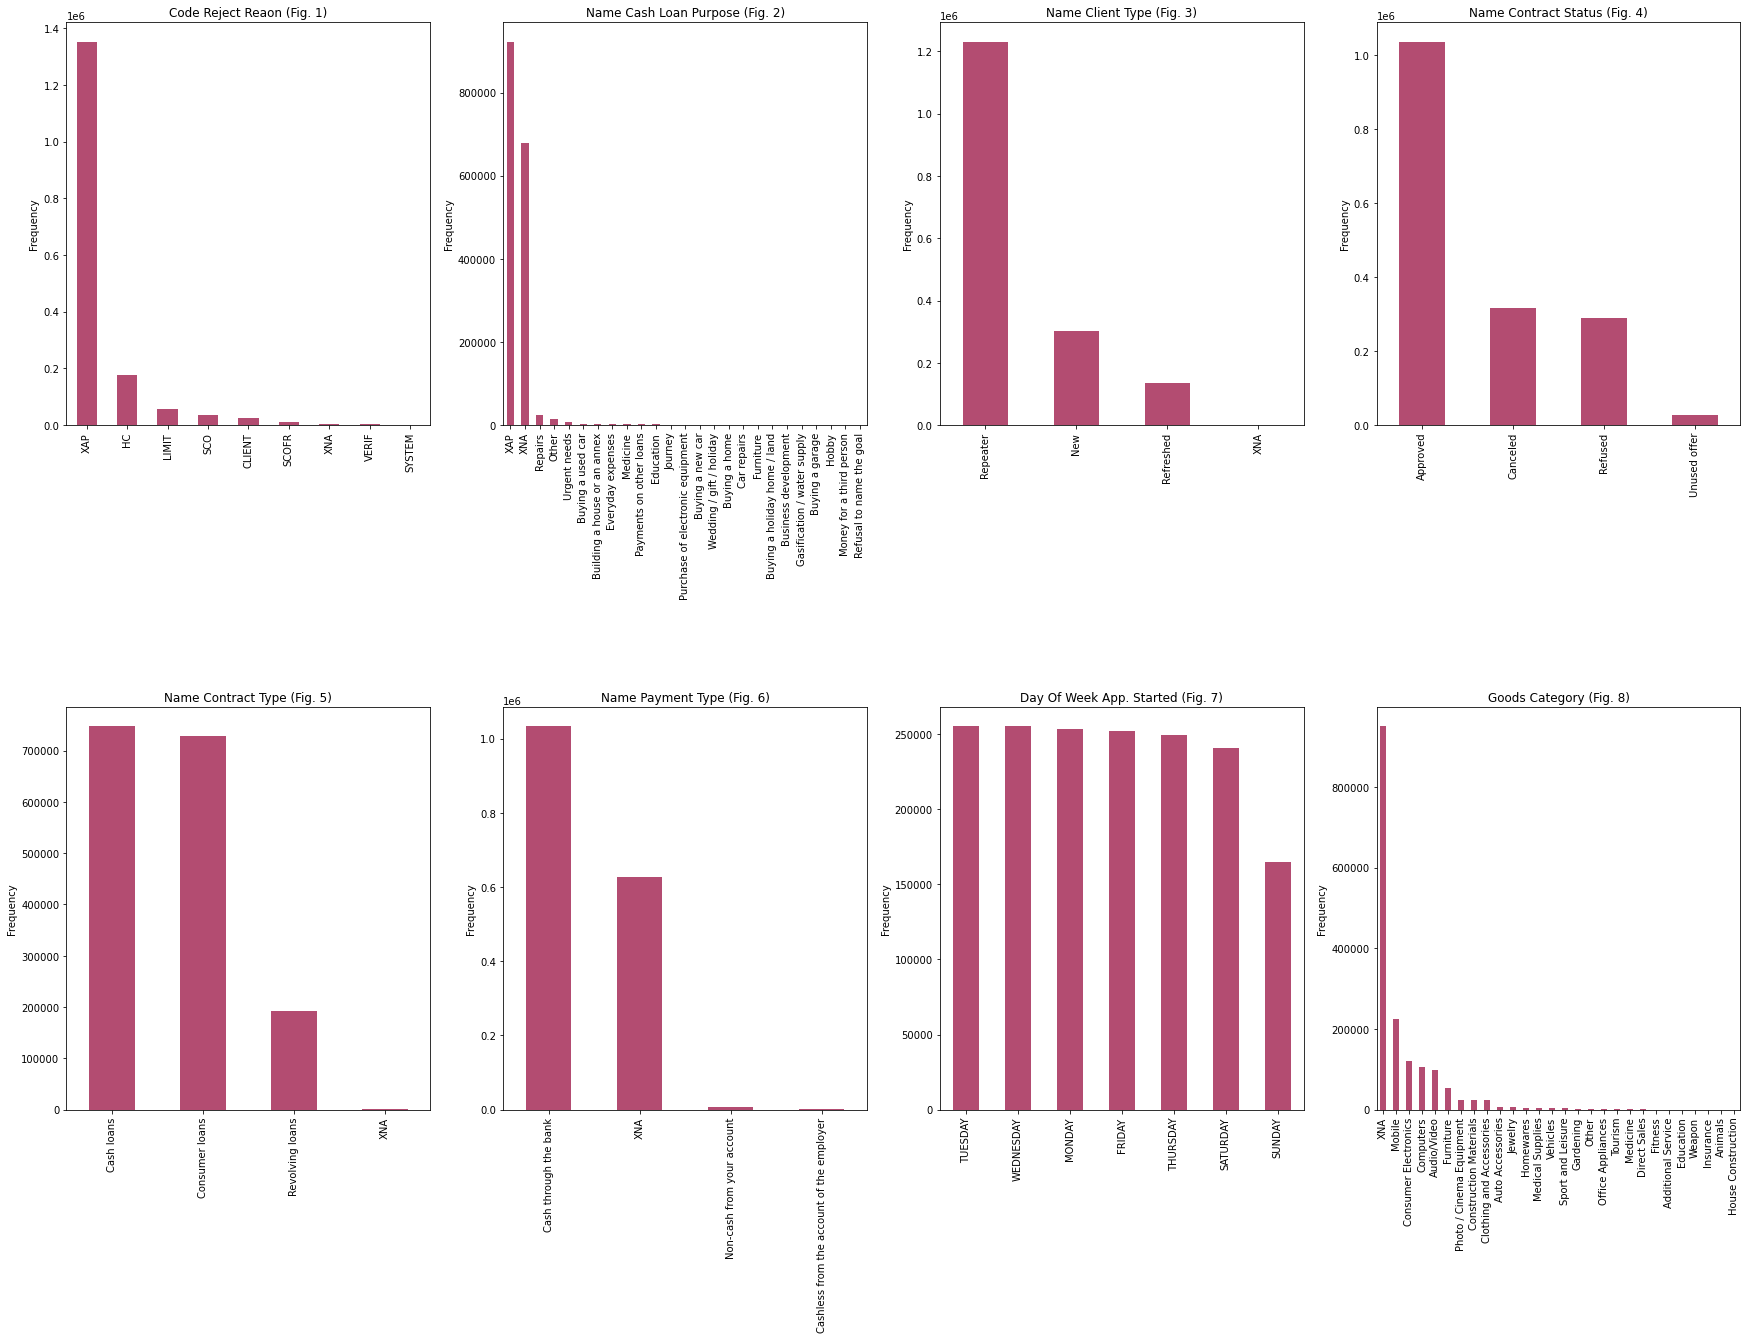

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(30,20))

fields = ['CODE_REJECT_REASON', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_GOODS_CATEGORY']

charts = {
    0 : {
        'title' : 'Code Reject Reaon (Fig. 1)',
        'field' : 'CODE_REJECT_REASON'
    },
    1 : {
        'title' : 'Name Cash Loan Purpose (Fig. 2)',
        'field' : 'NAME_CASH_LOAN_PURPOSE'
    },
    2 : {
        'title' : 'Name Client Type (Fig. 3)',
        'field' : 'NAME_CLIENT_TYPE' 
    },
    3 : {
        'title' : 'Name Contract Status (Fig. 4)',
        'field' : 'NAME_CONTRACT_STATUS' 
    },
    4 : {
        'title' : 'Name Contract Type (Fig. 5)',
        'field' : 'NAME_CONTRACT_TYPE' 
    },
    5 : {
        'title' : 'Name Payment Type (Fig. 6)',
        'field' : 'NAME_PAYMENT_TYPE' 
    },
    6 : {
        'title' : 'Day Of Week App. Started (Fig. 7)',
        'field' : 'WEEKDAY_APPR_PROCESS_START' 
    },
    7 : {
        'title' : 'Goods Category (Fig. 8)',
        'field' : 'NAME_GOODS_CATEGORY' 
    }
}

index = 0

for i in range(2):
    for j in range(4):
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_title(charts[index]['title'])
        pa_df[charts[index]['field']].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                        color = '#b34c71',
                                                                                        ax=axes[i, j])
        index += 1

plt.subplots_adjust(hspace = 0.7, wspace = 0.2)

From the above the following can be observed:
- The majority of previous applications were rejected for rejection code *XAP* (Fig. 1)
- Cash loans are normally made for the purpose codes *XAP* & *XNA* (Fig. 2)
    - NOTE: In regards to this CSV, the codes XAP and XNA refer to the a "null/NA" value.
- There are 3x as many repeat applicants as there are new ones (Fig. 3)
- The majority of previous applicaitons were approved (Fig. 4)
- Just about the same amount of cash loans were made as consumer loans (Fig. 5)
- Most payments were made as cash through the bank (Fig. 6)

NOTE: How should we handle 'XAP' & 'XNA' values? Does it matter if we do not know what these values represent in their respective features?

Let's see how this data changes if we just look at approvals.

In [86]:
approved_pa_df = pa_df[pa_df['NAME_CONTRACT_STATUS'] == 'Approved']
approved_pa_df.shape

(1036781, 37)

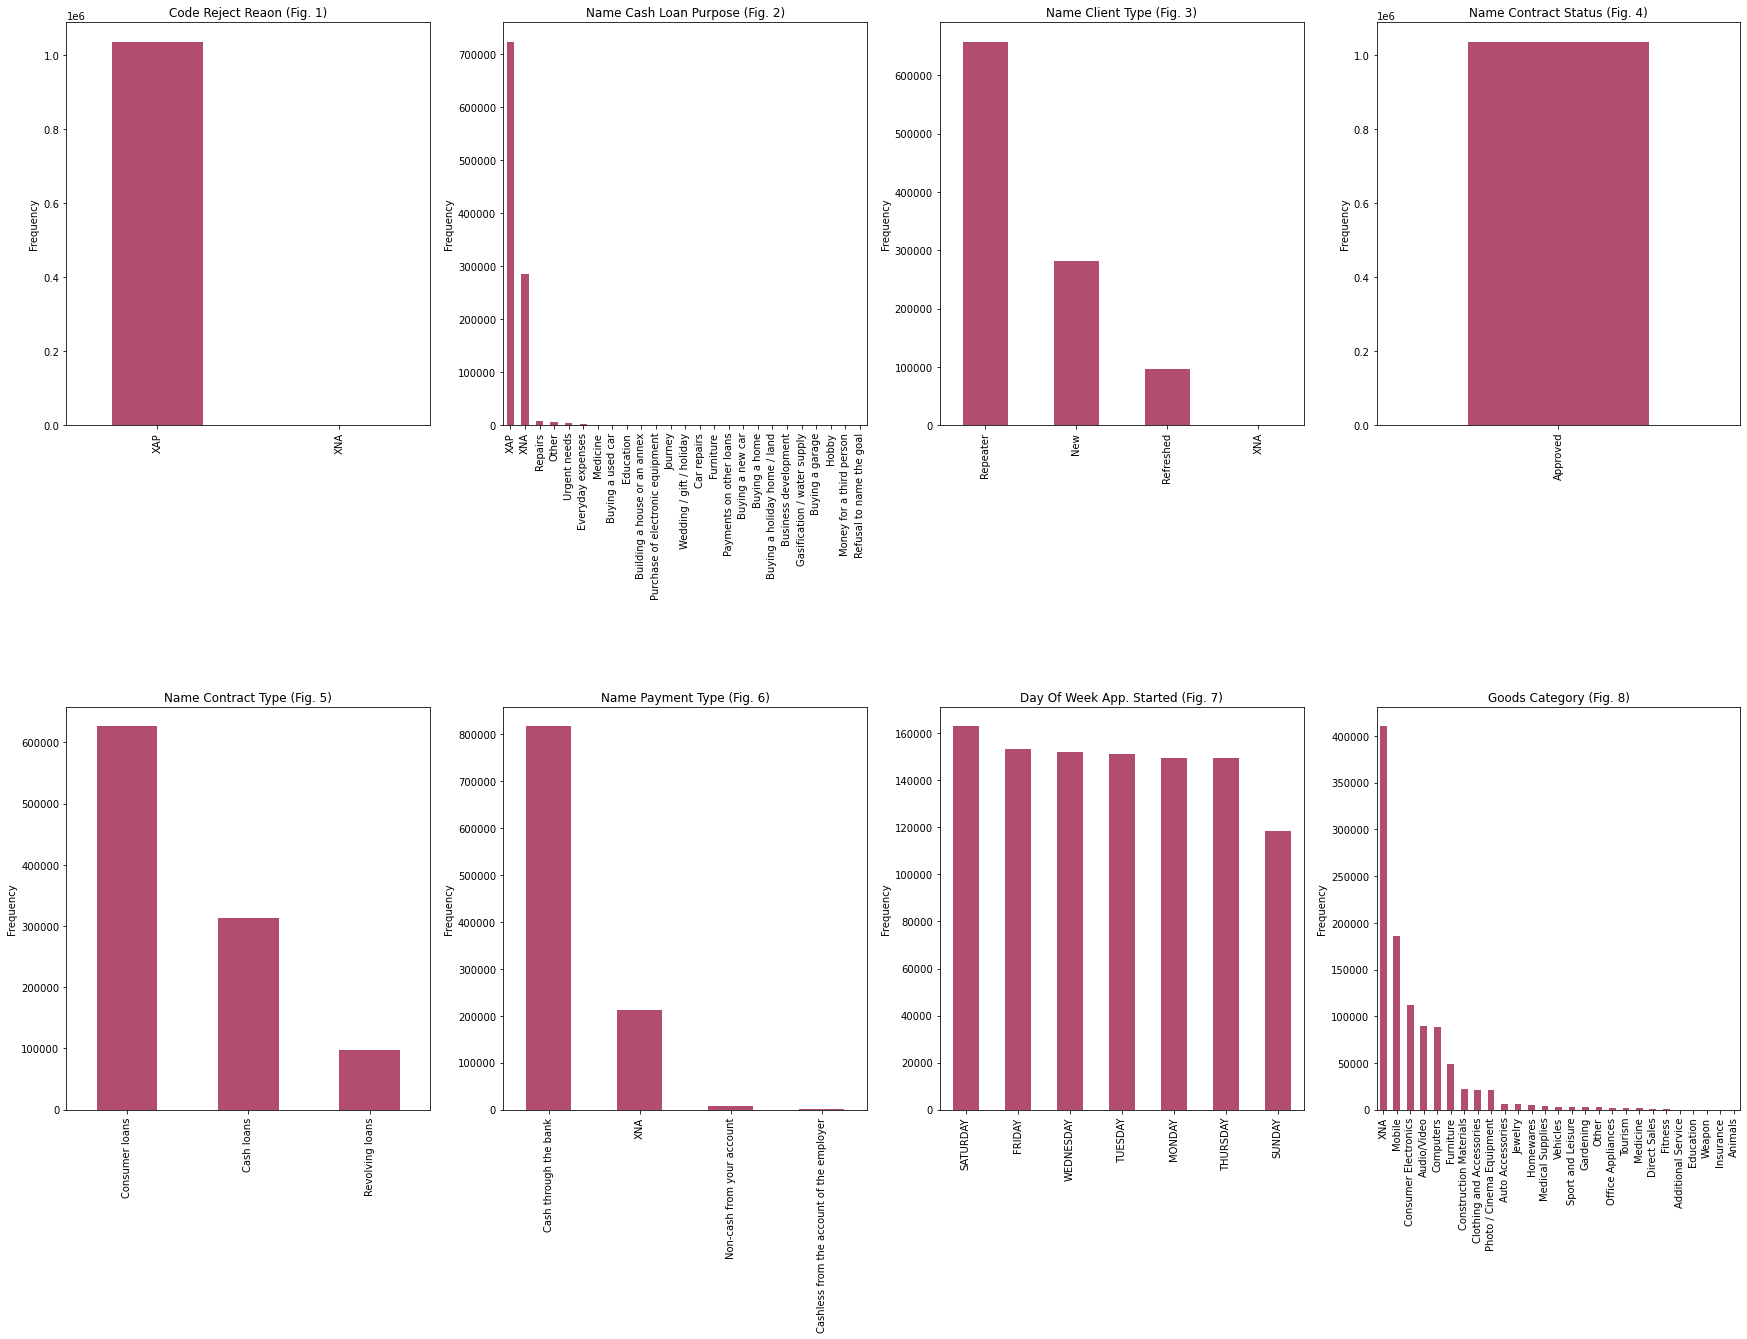

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(30,20))

index = 0

for i in range(2):
    for j in range(4):
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_title(charts[index]['title'])
        approved_pa_df[charts[index]['field']].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                                        color = '#b34c71',
                                                                                        ax=axes[i, j])
        index += 1

plt.subplots_adjust(hspace = 0.7, wspace = 0.2)

In [70]:
pa_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

Seems like a lot of data is missing, let's look at this in terms of percentages.

In [69]:
null_pa_df = pa_df.isnull()
null_sums = null_pa_df.sum().sort_values(ascending = False)
percentages = (null_pa_df.sum() / null_pa_df.count() * 100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Sum', 'Percent'])

,Sum,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


- There are 14 features that are missing > 22% of the data.
- 21 features are 100% complete.
- **RATE_INTEREST_PRIMARY** & **RATE_INTEREST_PRIVILEGED** are each missing about 99% of the data. 

NOTE: Should we only look at the complete features or should we establish a way to handle the features that are incomplete?